In [2]:
!pip install imbalanced-learn

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# ===============================
# PHASE 5: DATA IMBALANCE HANDLING
# =============================== 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import sys
import os

In [15]:
path = os.path.abspath("../")
if(path not in sys.path):
    sys.path.append(path)

In [16]:
from src.Read_Any_File_Type import reading_data

# Load reduced dataset
file_path = "../data/interim/Diabetes-Reduced.csv"
data = reading_data(file_path)
df=data.read_data()

[SUCCESS] File loaded successfully: <class 'pandas.core.frame.DataFrame'>


=== CLASS DISTRIBUTION ANALYSIS ===


C:\Users\jops7\AppData\Local\Temp\ipykernel_31236\2560806680.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='coolwarm')


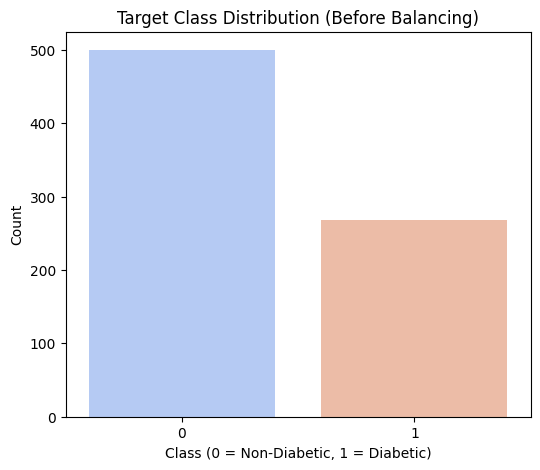


Class Distribution:
Class
0    500
1    268
Name: count, dtype: int64
Imbalance Ratio = 1.87:1


In [17]:
# =======================================================
# 1️⃣ CLASS DISTRIBUTION ANALYSIS
# =======================================================

print("=== CLASS DISTRIBUTION ANALYSIS ===")

# Visualize target variable distribution
plt.figure(figsize=(6, 5))
sns.countplot(x='Class', data=df, palette='coolwarm')
plt.title("Target Class Distribution (Before Balancing)")
plt.xlabel("Class (0 = Non-Diabetic, 1 = Diabetic)")
plt.ylabel("Count")
plt.show()

# Calculate imbalance ratio
class_counts = df['Class'].value_counts()
majority = class_counts.max()
minority = class_counts.min()
imbalance_ratio = round(majority / minority, 2)

print(f"\nClass Distribution:\n{class_counts}")
print(f"Imbalance Ratio = {imbalance_ratio}:1")


=== APPLYING BALANCING TECHNIQUES ===

After Random Undersampling: {0: np.int64(268), 1: np.int64(268)}
After SMOTE Oversampling: {1: np.int64(500), 0: np.int64(500)}
After SMOTE+ENN Hybrid: {1: np.int64(271), 0: np.int64(264)}


C:\Users\jops7\AppData\Local\Temp\ipykernel_31236\3356401350.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_balanced, palette='viridis')


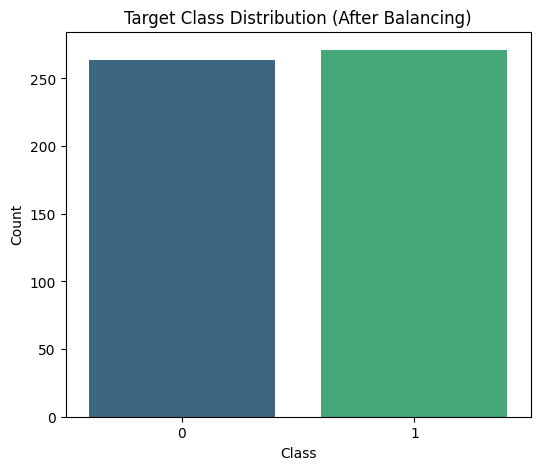

In [18]:
# =======================================================
# 2️⃣ BALANCING TECHNIQUES
# =======================================================

print("\n=== APPLYING BALANCING TECHNIQUES ===")

# Split features and target
X = df.drop(columns=['Class'])
y = df['Class']

# --- Option 1: Random Undersampling (for quick balance) ---
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)
print(f"\nAfter Random Undersampling: {dict(pd.Series(y_under).value_counts())}")

# --- Option 2: SMOTE (Synthetic Minority Oversampling Technique) ---
smote = SMOTE(random_state=42)
X_over, y_over = smote.fit_resample(X, y)
print(f"After SMOTE Oversampling: {dict(pd.Series(y_over).value_counts())}")

# --- Option 3: SMOTE + Edited Nearest Neighbors (Hybrid) ---
smote_enn = SMOTEENN(random_state=42)
X_balanced, y_balanced = smote_enn.fit_resample(X, y)
print(f"After SMOTE+ENN Hybrid: {dict(pd.Series(y_balanced).value_counts())}")

# Visualize balanced class distribution
plt.figure(figsize=(6, 5))
sns.countplot(x=y_balanced, palette='viridis')
plt.title("Target Class Distribution (After Balancing)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [19]:
# =======================================================
# SAVE BALANCED DATASET
# =======================================================

# Combine X and y for final balanced dataset
balanced_df = pd.DataFrame(X_balanced, columns=X.columns)
balanced_df['Class'] = y_balanced

balanced_df.to_csv("../data/cleaned/Diabetes-Balanced.csv", index=False)
print("\n✅ Balanced dataset saved as 'Diabetes-Balanced.csv'")


✅ Balanced dataset saved as 'Diabetes-Balanced.csv'
